In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("../data/clean/full_dataset.csv")

In [3]:
data.head()

,ID Number,Preferred Pronouns,Current Grade Level,Program,First Paying Job,Know employee,Applied Before,Comfortable speaking to crowd,Uncomfortable with,Extra activities,...,Application Year,Current Age,Rejected,EECode,EarnHours,EarnRate,EarnAmount,Dist Position Desc,Year,Month
0,1489.0,masculine,9.0,zoocamp,1,0,0,1.0,invertebrates,0,...,2022,NaN,0,1489.0,5.50,13.0,71.50,WILD Steward,2022.0,4.0
1,1489.0,masculine,9.0,zoocamp,1,0,0,1.0,invertebrates,0,...,2022,NaN,0,1489.0,14.47,13.0,188.11,WILD Steward,2022.0,5.0
2,1489.0,masculine,9.0,zoocamp,1,0,0,1.0,invertebrates,0,...,2022,NaN,0,1489.0,7.13,13.0,92.69,WILD Steward,2022.0,5.0
3,1489.0,masculine,9.0,zoocamp,1,0,0,1.0,invertebrates,0,...,2022,NaN,0,1489.0,130.38,13.0,1694.94,WILD Steward,2022.0,6.0
4,1489.0,masculine,9.0,zoocamp,1,0,0,1.0,invertebrates,0,...,2022,NaN,0,1489.0,123.80,13.0,1609.40,WILD Steward,2022.0,7.0


In [28]:
data.tail()

,ID Number,Preferred Pronouns,Current Grade Level,Program,First Paying Job,Know employee,Applied Before,Comfortable speaking to crowd,Uncomfortable with,Extra activities,...,Application Year,Current Age,Rejected,EECode,EarnHours,EarnRate,EarnAmount,Dist Position Desc,Year,Month
778,NaN,feminine,11.0,NaN,0,1,0,0.0,reptiles,0,...,2020,16.0,1,NaN,0.0,NaN,NaN,NaN,NaN,NaN
779,NaN,masculine,10.0,NaN,1,0,0,1.0,none,0,...,2020,15.0,1,NaN,0.0,NaN,NaN,NaN,NaN,NaN
780,NaN,feminine,10.0,NaN,1,0,0,1.0,invertebrates,0,...,2020,15.0,1,NaN,0.0,NaN,NaN,NaN,NaN,NaN
781,NaN,feminine,10.0,NaN,1,1,0,0.0,invertebrates,0,...,2020,15.0,1,NaN,0.0,NaN,NaN,NaN,NaN,NaN
782,NaN,masculine,10.0,NaN,0,0,0,0.0,none,0,...,2020,16.0,1,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['ID Number', 'Preferred Pronouns', 'Current Grade Level', 'Program',
       'First Paying Job', 'Know employee', 'Applied Before',
       'Comfortable speaking to crowd', 'Uncomfortable with',
       'Extra activities', 'Commit Summer', 'Commit Weekday',
       'Hear about source', 'Application Year', 'Current Age', 'Rejected',
       'EECode', 'EarnHours', 'EarnRate', 'EarnAmount', 'Dist Position Desc',
       'Year', 'Month'],
      dtype='object')

In [5]:


data['Commit Summer'] = data['Commit Summer'].fillna('no').map({'yes':2,'no':0, 'unsure':1})
data['Commit Summer'].unique()

array([2, 1, 0], dtype=int64)

In [6]:
data['Commit Weekday'].unique()
data['Commit Weekday'] = data['Commit Weekday'].fillna('no').map({'yes':2,'no':0, 'unsure':1})
data['Commit Weekday'].unique()

array([2, 1, 0], dtype=int64)

In [7]:
data['Hear about source'].unique()
data['Hear about source'] = data['Hear about source'].fillna('no').map({'no':0, 'other':1, 'friend':2, 'school':2,
'social media':1, 'family':2})
data['Hear about source'].unique()

array([1, 2, 0], dtype=int64)

In [8]:
data['EarnHours'] = data['EarnHours'].fillna(0)
data['Current Grade Level'] = data['Current Grade Level'].fillna(0)
data['Comfortable speaking to crowd'] = data['Comfortable speaking to crowd'].fillna(0)
data['Comfortable speaking to crowd'].unique()

array([1., 0.])

In [29]:
# Select data with ID Number and get average hours
data_with_id = data[['ID Number', 'Current Grade Level', 'First Paying Job', 'Know employee', 'Applied Before',
'Comfortable speaking to crowd','Extra activities','Commit Summer', 'Commit Weekday',
 'Hear about source', 'EarnHours'
]]
data_with_id = data_with_id.groupby('ID Number').mean()
data_with_id

,Current Grade Level,First Paying Job,Know employee,Applied Before,Comfortable speaking to crowd,Extra activities,Commit Summer,Commit Weekday,Hear about source,EarnHours
ID Number,,,,,,,,,,
1154.0,9.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,2.0,24.831667
1155.0,10.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,22.284444
1156.0,11.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,27.921429
1157.0,10.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.000000
1158.0,9.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,31.174333
1160.0,10.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,34.681905
1161.0,10.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,22.931724
1162.0,8.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,30.890769
1163.0,10.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,38.288571


In [31]:
data_without_id = data[['ID Number', 'Current Grade Level', 'First Paying Job', 'Know employee', 'Applied Before',
'Comfortable speaking to crowd','Extra activities','Commit Summer', 'Commit Weekday',
 'Hear about source', 'EarnHours'
]]
data_without_id = data_without_id[data_without_id['ID Number'].isnull()]
data_without_id

,ID Number,Current Grade Level,First Paying Job,Know employee,Applied Before,Comfortable speaking to crowd,Extra activities,Commit Summer,Commit Weekday,Hear about source,EarnHours
10,NaN,11.0,0,0,0,1.0,0,1,2,1,0.0
20,NaN,9.0,0,0,0,1.0,1,2,2,1,0.0
21,NaN,10.0,0,0,0,1.0,1,1,1,1,0.0
22,NaN,10.0,1,0,0,1.0,1,1,1,2,0.0
33,NaN,9.0,1,1,0,1.0,1,2,2,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...
778,NaN,11.0,0,1,0,0.0,0,2,2,2,0.0
779,NaN,10.0,1,0,0,1.0,0,2,2,1,0.0
780,NaN,10.0,1,0,0,1.0,0,0,2,2,0.0
781,NaN,10.0,1,1,0,0.0,0,2,2,2,0.0


In [34]:
# Avg the earned hours
all_data = pd.concat([data_with_id, data_without_id])
all_data

,Current Grade Level,First Paying Job,Know employee,Applied Before,Comfortable speaking to crowd,Extra activities,Commit Summer,Commit Weekday,Hear about source,EarnHours,ID Number
1154.0,9.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,2.0,24.831667,NaN
1155.0,10.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,22.284444,NaN
1156.0,11.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,27.921429,NaN
1157.0,10.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.000000,NaN
1158.0,9.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,31.174333,NaN
...,...,...,...,...,...,...,...,...,...,...,...
778.0,11.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.000000,NaN
779.0,10.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,0.000000,NaN
780.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.000000,NaN
781.0,10.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.000000,NaN


# Train Model with rejected data

In [35]:
X = all_data[['Current Grade Level', 'First Paying Job', 'Know employee', 'Applied Before',
'Comfortable speaking to crowd','Extra activities','Commit Summer', 'Commit Weekday',
 'Hear about source', 
]]
X

,Current Grade Level,First Paying Job,Know employee,Applied Before,Comfortable speaking to crowd,Extra activities,Commit Summer,Commit Weekday,Hear about source
1154.0,9.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,2.0
1155.0,10.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
1156.0,11.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0
1157.0,10.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
1158.0,9.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
778.0,11.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0
779.0,10.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0
780.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0
781.0,10.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0


In [36]:

y =  all_data[['EarnHours']]
y

,EarnHours
1154.0,24.831667
1155.0,22.284444
1156.0,27.921429
1157.0,0.000000
1158.0,31.174333
...,...
778.0,0.000000
779.0,0.000000
780.0,0.000000
781.0,0.000000


In [49]:
model = LinearRegression()
model.fit(X, y)
model.coef_

array([[ 0.17931399,  0.61157691,  1.50573439, -1.80936565,  2.78122656,
         3.98364902,  1.52738581,  1.76883822, -3.77923349]])

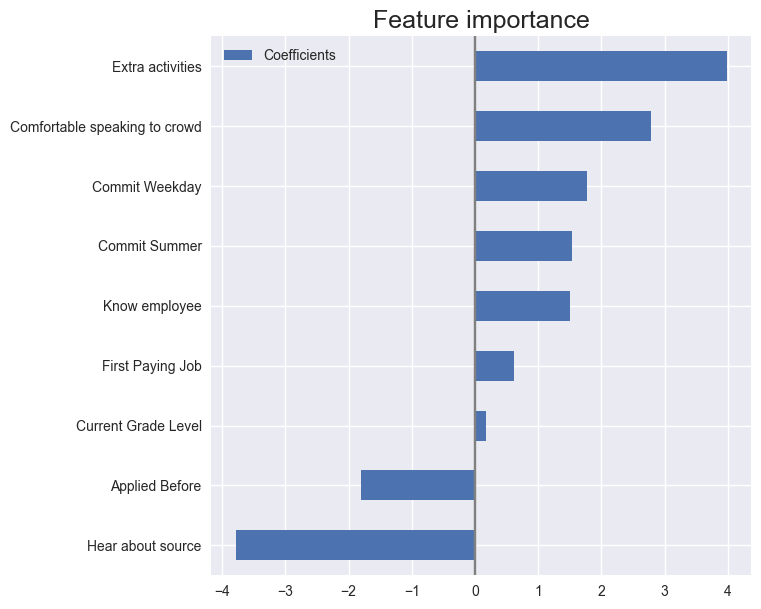

In [39]:

coefs = pd.DataFrame(
   model.coef_.transpose(),
   columns=['Coefficients'], index=X.columns
)
coefs = coefs.sort_values(by=['Coefficients'])
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Feature importance')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)



In [40]:
print(X.shape)
print(y.shape)

(313, 9)
(313, 1)


# Train model with only accepted data

In [45]:
X_id = data_with_id[['Current Grade Level', 'First Paying Job', 'Know employee', 'Applied Before',
'Comfortable speaking to crowd','Extra activities','Commit Summer', 'Commit Weekday',
 'Hear about source', 
]]
X_id

,Current Grade Level,First Paying Job,Know employee,Applied Before,Comfortable speaking to crowd,Extra activities,Commit Summer,Commit Weekday,Hear about source
ID Number,,,,,,,,,
1154.0,9.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,2.0
1155.0,10.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
1156.0,11.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0
1157.0,10.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
1158.0,9.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0
1160.0,10.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0
1161.0,10.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0
1162.0,8.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0
1163.0,10.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0


In [46]:

y_id =  data_with_id[['EarnHours']]
y_id

,EarnHours
ID Number,
1154.0,24.831667
1155.0,22.284444
1156.0,27.921429
1157.0,0.000000
1158.0,31.174333
1160.0,34.681905
1161.0,22.931724
1162.0,30.890769
1163.0,38.288571


In [48]:
print(X_id.shape)
print(y_id.shape)

(33, 9)
(33, 1)


In [51]:
model_id = LinearRegression()
model_id.fit(X_id, y_id)
model_id.coef_

array([[-1.24544449, -7.29557348, -4.1653467 ,  4.07448377, 12.88148139,
         5.02384802, 11.81720016,  0.        , -4.21349375]])

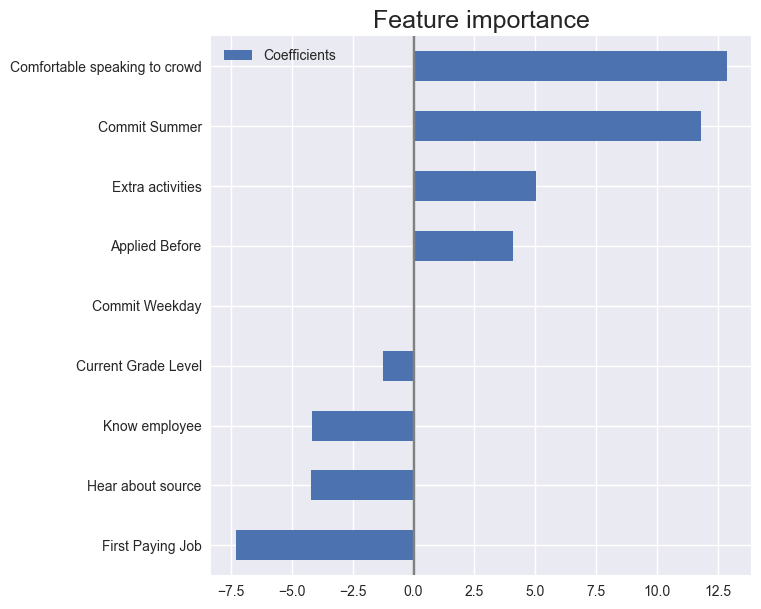

In [52]:

coefs = pd.DataFrame(
   model_id.coef_.transpose(),
   columns=['Coefficients'], index=X_id.columns
)
coefs = coefs.sort_values(by=['Coefficients'])
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Feature importance')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)



In [41]:


regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [-0.31776621]
Coefficients: 
 [[ 0.17931399  0.61157691  1.50573439 -1.80936565  2.78122656  3.98364902
   1.52738581  1.76883822 -3.77923349]]
                                 OLS Regression Results                                
Dep. Variable:              EarnHours   R-squared (uncentered):                   0.159
Model:                            OLS   Adj. R-squared (uncentered):              0.134
Method:                 Least Squares   F-statistic:                              6.377
Date:                Fri, 10 Feb 2023   Prob (F-statistic):                    2.72e-08
Time:                        22:11:00   Log-Likelihood:                         -1199.3
No. Observations:                 313   AIC:                                      2417.
Df Residuals:                     304   BIC:                                      2450.
Df Model:                           9                                                  
Covariance Type:            nonrobust              

In [42]:

plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

C:\Users\weilin\AppData\Local\Temp\ipykernel_19088\1446434181.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # pretty matplotlib plots


In [43]:
model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X, y], axis=1)

In [44]:
# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

TypeError: residplot() got multiple values for argument 'data'

<Figure size 800x550 with 0 Axes>

In [ ]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]))

: 

In [ ]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

  # annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i,
                            xy=(model_fitted_y[i],
                            model_norm_residuals_abs_sqrt[i]))

: 

In [ ]:
plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

  # annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i,
    xy=(model_leverage[i],
        model_norm_residuals[i]))

: 